In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [51]:
df=pd.read_csv('School data.csv')

In [52]:
df.sample(10)

,School_ID,District,Block,Urban_Rural,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
2485,SCH_2486,District_A,Block_A2,Rural,65.34,70.34,55.22,100.0,7.8,2,1,0.0,0,1,34.5,7.9,NaN
4723,SCH_4724,District_A,Block_A3,Urban,44.80,43.88,31.00,32.6,6.6,1,1,0.0,1,0,22.7,28.7,67.1
4668,SCH_4669,District_A,Block_A2,Rural,66.61,70.55,71.42,37.6,2.7,2,1,0.0,1,0,35.6,11.2,40.9
2311,SCH_2312,District_C,Block_C2,Rural,34.23,48.44,56.30,42.4,2.6,5,1,1.0,1,1,38.9,16.7,53.5
2463,SCH_2464,District_B,Block_B3,Rural,67.97,74.40,83.90,40.6,9.2,3,1,0.0,1,1,41.5,11.8,32.8
1908,SCH_1909,District_B,Block_B3,Rural,69.87,85.14,78.06,23.0,0.0,2,1,1.0,1,1,52.0,2.7,58.4
677,SCH_678,District_C,Block_C2,Rural,76.97,70.83,69.96,NaN,7.7,2,1,0.0,1,1,39.5,11.0,45.4
3458,SCH_3459,District_B,Block_B3,Rural,72.80,80.83,86.91,17.6,7.2,2,1,0.0,1,0,24.3,15.9,50.0
3633,SCH_3634,District_B,Block_B2,Rural,48.18,44.78,51.15,22.8,2.8,2,1,1.0,1,0,44.7,3.4,54.2
4365,SCH_4366,District_C,Block_C1,Rural,63.62,70.30,57.33,33.5,6.9,4,1,0.0,1,0,30.6,0.5,46.2


## Data Preparation

In [53]:
df.dtypes

School_ID                         object
District                          object
Block                             object
Urban_Rural                       object
%_Math_Score                     float64
%_Language_Score                 float64
%_Science_Score                  float64
Teacher_Student_Ratio            float64
Avg_Teacher_Experience_Years     float64
Teacher_Trainings_Attended         int64
Electricity_Available              int64
Internet_Available               float64
Functional_Toilets                 int64
Library_Available                  int64
%_Marginalized_Students          float64
%_Students_With_Home_Internet    float64
Parent_Literacy_Rate             float64
dtype: object

In [54]:
df.describe(include='object')

,School_ID,District,Block,Urban_Rural
count,5200,5200,5200,5200
unique,5200,3,9,2
top,SCH_1,District_C,Block_C3,Rural
freq,1,1810,622,3579


In [55]:
df['District'].unique()

array(['District_C', 'District_A', 'District_B'], dtype=object)

In [56]:
df['Block'].unique()

array(['Block_C1', 'Block_A3', 'Block_B1', 'Block_A1', 'Block_C3',
       'Block_C2', 'Block_B3', 'Block_B2', 'Block_A2'], dtype=object)

In [57]:
df['Urban_Rural'].unique()

array(['Rural', 'Urban'], dtype=object)

#### Categorical Columns: School_ID, District (3 districts), Block (9 blocks), Urban_Rural

In [58]:
df.shape

(5200, 17)

In [59]:
df.drop_duplicates()

,School_ID,District,Block,Urban_Rural,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
0,SCH_1,District_C,Block_C1,Rural,43.32,48.87,48.89,40.1,5.7,1,1,0.0,1,0,29.7,5.7,33.9
1,SCH_2,District_A,Block_A3,Rural,81.98,83.18,83.26,NaN,5.8,1,1,0.0,0,0,36.1,4.0,40.6
2,SCH_3,District_B,Block_B1,Rural,44.68,46.38,40.19,29.9,7.1,2,1,1.0,0,0,38.9,17.4,47.6
3,SCH_4,District_A,Block_A1,Urban,44.86,35.20,47.77,24.6,2.6,1,1,1.0,0,0,11.2,35.8,73.3
4,SCH_5,District_C,Block_C1,Rural,47.41,47.94,50.99,39.8,6.1,1,1,0.0,1,0,33.1,13.6,35.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,SCH_5196,District_A,Block_A3,Rural,NaN,63.21,67.84,17.5,13.7,0,1,0.0,1,0,24.8,0.0,52.5
5196,SCH_5197,District_A,Block_A1,Urban,64.93,65.44,43.21,37.4,13.3,0,1,1.0,1,1,24.3,32.1,52.1
5197,SCH_5198,District_B,Block_B1,Rural,67.46,66.19,67.65,40.3,12.7,2,0,0.0,1,0,34.3,19.7,31.1
5198,SCH_5199,District_C,Block_C2,Urban,58.35,74.95,57.28,35.1,0.0,2,1,0.0,1,1,23.8,3.4,33.6


In [60]:
df.describe()

,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
count,4942.000000,5200.000000,5200.000000,4940.000000,5200.000000,5200.000000,5200.000000,4940.000000,5200.000000,5200.000000,5200.000000,5200.000000,4941.000000
mean,60.055898,62.970896,61.338762,29.980951,8.096596,1.995385,0.895577,0.295344,0.954423,0.483462,30.401288,16.770077,49.776644
std,15.106160,16.569802,18.025438,9.957824,3.916906,1.430434,0.305838,0.456243,0.208586,0.499774,11.916650,12.773571,16.936643
min,0.326857,1.380000,1.510000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,49.582500,51.520000,48.890000,23.100000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,22.300000,6.200000,38.400000
50%,59.850000,63.030000,61.150000,29.800000,8.000000,2.000000,1.000000,0.000000,1.000000,0.000000,31.000000,15.200000,49.500000
75%,70.630000,74.452500,73.950000,36.600000,10.800000,3.000000,1.000000,1.000000,1.000000,1.000000,38.800000,25.300000,60.800000
max,107.344878,100.000000,100.000000,100.000000,22.700000,9.000000,1.000000,1.000000,1.000000,1.000000,73.100000,66.000000,150.000000


### Outliers
##### %_Math_Score has outliers as percentage value cannot be greater than 100
##### Parent_Literacy_Rate cannot be negative

### NULL Values: 
#### %_Math_Score, Teacher_Student_Ratio, Internet_Available, Parent_Literacy_Rate

### Handling Oultliers and NULL values of column %_Math_Score

{'whiskers': [<matplotlib.lines.Line2D at 0x21bf9b0fd90>,
 'caps': [<matplotlib.lines.Line2D at 0x21bf96164f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21bf9a7f760>],
 'medians': [<matplotlib.lines.Line2D at 0x21bf9a853d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21bf98657f0>],
 'means': []}

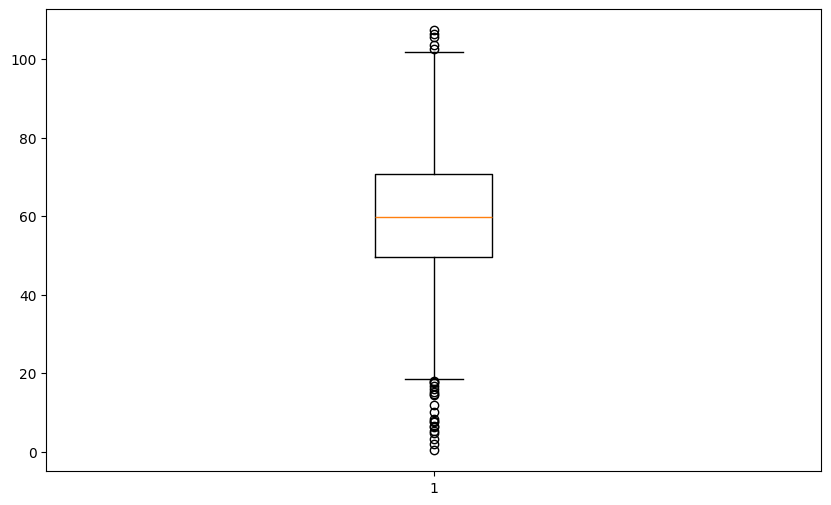

In [61]:
plt.figure(figsize=(10, 6)) # Create a decent-sized figure
plt.boxplot(df['%_Math_Score'].dropna())

In [62]:
# Check the distribution of your data
df['%_Math_Score'].describe()

count    4942.000000
mean       60.055898
std        15.106160
min         0.326857
25%        49.582500
50%        59.850000
75%        70.630000
max       107.344878
Name: %_Math_Score, dtype: float64

In [63]:
df['%_Math_Score']

0       43.32
1       81.98
2       44.68
3       44.86
4       47.41
        ...  
5195      NaN
5196    64.93
5197    67.46
5198    58.35
5199    38.73
Name: %_Math_Score, Length: 5200, dtype: float64

In [64]:
df['%_Math_Score'].isnull().sum()

258

In [65]:
missing_percentage = df['%_Math_Score'].isnull().sum() / len(df) * 100
print(f"Missing percentage: {missing_percentage:.2f}%")

Missing percentage: 4.96%


<Axes: ylabel='Density'>

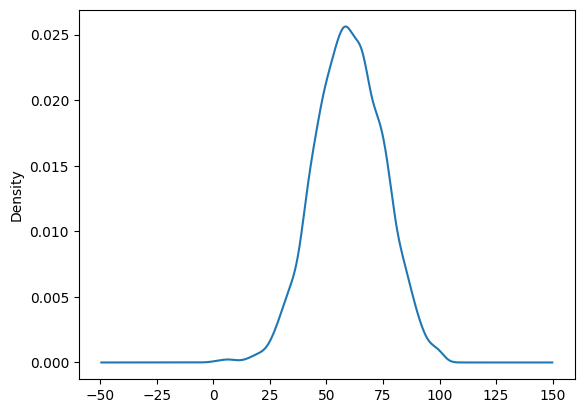

In [66]:
df.loc[df['%_Math_Score'] <= 100, '%_Math_Score'].plot(kind='kde')

In [67]:
df.loc[df['%_Math_Score'] <= 100, '%_Math_Score'].mean()

59.985334545435755

In [68]:
df.loc[df['%_Math_Score'] <= 100, '%_Math_Score'].median()

59.81

Since the distribution is approximately normal, and

Mean and median are almost identical, and

Missing percentage is < 5%,

Impute missing values using the MEAN

In [69]:
df['%_Math_Score'] = df['%_Math_Score'].fillna(df['%_Math_Score'].mean())
#First impute because it will remove null values also
df=df[df['%_Math_Score']<=100]

In [70]:
df['%_Math_Score'].describe()

count    5192.000000
mean       59.988841
std        14.638083
min         0.326857
25%        50.177500
50%        60.055898
75%        69.872500
max       100.000000
Name: %_Math_Score, dtype: float64

### Handling Oultliers and NULL values of column Parent_Literacy_Rate

In [71]:
df['Parent_Literacy_Rate'].describe()

count    4933.000000
mean       49.791648
std        16.922929
min        -5.000000
25%        38.400000
50%        49.500000
75%        60.800000
max       150.000000
Name: Parent_Literacy_Rate, dtype: float64

Literacy rate cannot be negative or greater than 100

{'whiskers': [<matplotlib.lines.Line2D at 0x21bfb6c23d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21bf9470280>,
 'boxes': [<matplotlib.lines.Line2D at 0x21bfb6a1fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x21bfb6b0160>],
 'fliers': [<matplotlib.lines.Line2D at 0x21bfb6b0c70>],
 'means': []}

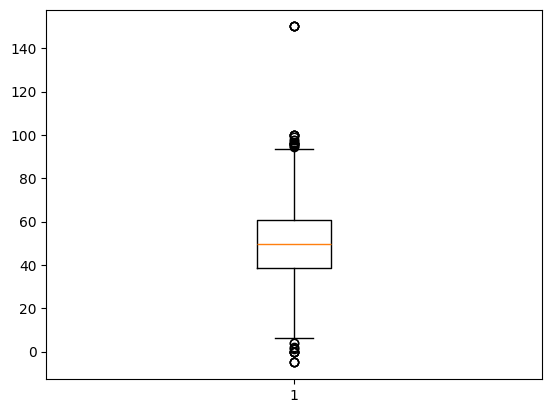

In [72]:
plt.boxplot(df['Parent_Literacy_Rate'].dropna())

<Axes: ylabel='Density'>

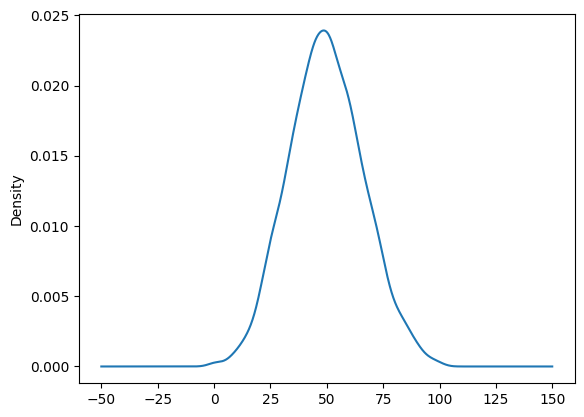

In [73]:
df.loc[(df['Parent_Literacy_Rate'] <= 100) & (df['Parent_Literacy_Rate'] >= 0),'Parent_Literacy_Rate'].plot(kind='kde')

If we remove negative values and more than 100 vaues the distribution is normal so we can remove it 

In [74]:
df['Parent_Literacy_Rate'].isnull().sum()

259

In [75]:
df['Parent_Literacy_Rate'].isnull().sum()*100/len(df)

4.988443759630201

In [76]:
df['Parent_Literacy_Rate'].mean()

49.79164808433003

In [77]:
df['Parent_Literacy_Rate'].median()

49.5

Since the distribution is approximately normal, and

Mean and median are almost identical, and

Missing percentage is < 5%,

Impute missing values using the MEAN

In [78]:
df['Parent_Literacy_Rate'] = df['Parent_Literacy_Rate'].fillna(df['Parent_Literacy_Rate'].mean())
#First impute because it will remove null values also
df=df[(df['Parent_Literacy_Rate']<=100) & (df['Parent_Literacy_Rate']>=0)]

#### Handling Teacher_Student_Ratio NULL values

In [79]:
df['Teacher_Student_Ratio'].describe()

count    4924.000000
mean       29.989318
std         9.954838
min         1.000000
25%        23.100000
50%        29.800000
75%        36.600000
max       100.000000
Name: Teacher_Student_Ratio, dtype: float64

In [80]:
df['Teacher_Student_Ratio'].isnull().sum()

259

In [81]:
df['Teacher_Student_Ratio'].isnull().sum()*100/len(df)

4.997105923210496

In [82]:
df['Teacher_Student_Ratio']=df['Teacher_Student_Ratio'].fillna(df['Teacher_Student_Ratio'].mean())

#### Internet_Available NULL values

In [83]:
df['Internet_Available'].describe()

count    4924.000000
mean        0.294882
std         0.456036
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Internet_Available, dtype: float64

As This column has binary values null values can be replaced by mode value

In [84]:
df['Internet_Available'].mode()

0    0.0
Name: Internet_Available, dtype: float64

In [85]:
df['Internet_Available']=df['Internet_Available'].fillna(df['Internet_Available'].mode()[0])

In [86]:
df['Internet_Available'].isnull().sum()

0

In [87]:
df.isnull().sum()

School_ID                        0
District                         0
Block                            0
Urban_Rural                      0
%_Math_Score                     0
%_Language_Score                 0
%_Science_Score                  0
Teacher_Student_Ratio            0
Avg_Teacher_Experience_Years     0
Teacher_Trainings_Attended       0
Electricity_Available            0
Internet_Available               0
Functional_Toilets               0
Library_Available                0
%_Marginalized_Students          0
%_Students_With_Home_Internet    0
Parent_Literacy_Rate             0
dtype: int64

## Exploratory & Statistical Analysis 

In [88]:
df['%_Math_Score'].describe()

count    5183.000000
mean       59.992188
std        14.629859
min         0.326857
25%        50.175000
50%        60.055898
75%        69.845000
max       100.000000
Name: %_Math_Score, dtype: float64

(array([  11.,   17.,   92.,  308.,  867., 1473., 1140.,  839.,  337.,
          99.]),
 array([  0.32685673,  10.29417106,  20.26148539,  30.22879971,
         40.19611404,  50.16342837,  60.13074269,  70.09805702,
         80.06537135,  90.03268567, 100.        ]),
 <BarContainer object of 10 artists>)

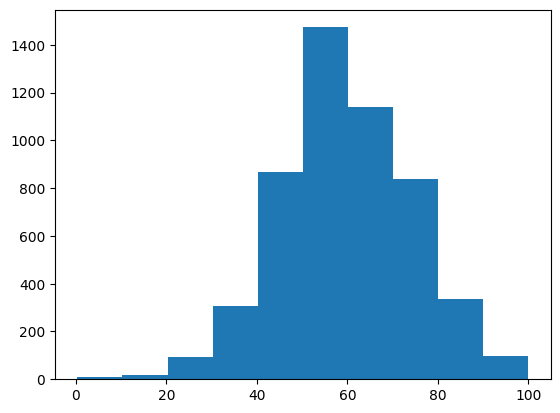

In [89]:
plt.hist(df['%_Math_Score'],bins=10)

In [90]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,%_Math_Score,%_Language_Score,%_Science_Score,Teacher_Student_Ratio,Avg_Teacher_Experience_Years,Teacher_Trainings_Attended,Electricity_Available,Internet_Available,Functional_Toilets,Library_Available,%_Marginalized_Students,%_Students_With_Home_Internet,Parent_Literacy_Rate
%_Math_Score,1.000000,0.840875,0.775072,0.003033,-0.018319,0.006932,0.011303,0.009862,0.003417,-0.001640,0.007592,-0.020420,0.010623
%_Language_Score,0.840875,1.000000,0.815375,-0.002305,-0.016850,0.010057,0.009618,-0.002151,0.017044,0.011038,0.014375,-0.018897,0.001779
%_Science_Score,0.775072,0.815375,1.000000,-0.008251,-0.023566,0.012022,0.014107,-0.004093,0.010367,0.006888,0.004433,-0.012765,0.001240
Teacher_Student_Ratio,0.003033,-0.002305,-0.008251,1.000000,0.001000,0.004508,0.002016,0.003996,0.008247,-0.004766,-0.010916,-0.010034,0.011098
Avg_Teacher_Experience_Years,-0.018319,-0.016850,-0.023566,0.001000,1.000000,-0.010513,-0.009909,-0.005520,0.014040,0.008031,-0.011439,0.016077,0.015973
Teacher_Trainings_Attended,0.006932,0.010057,0.012022,0.004508,-0.010513,1.000000,0.009308,0.014370,0.002435,-0.007949,-0.001255,0.008111,0.017718
Electricity_Available,0.011303,0.009618,0.014107,0.002016,-0.009909,0.009308,1.000000,-0.019296,0.008304,-0.002148,0.013560,0.013620,-0.011492
Internet_Available,0.009862,-0.002151,-0.004093,0.003996,-0.005520,0.014370,-0.019296,1.000000,-0.007726,0.092328,-0.150744,0.185686,0.101847
Functional_Toilets,0.003417,0.017044,0.010367,0.008247,0.014040,0.002435,0.008304,-0.007726,1.000000,0.025613,0.010035,0.005062,-0.001815
Library_Available,-0.001640,0.011038,0.006888,-0.004766,0.008031,-0.007949,-0.002148,0.092328,0.025613,1.000000,-0.136840,0.210650,0.132863


In [91]:
math_score_correlations = correlation_matrix['%_Math_Score'].sort_values(ascending=False)
math_score_correlations

%_Math_Score                     1.000000
%_Language_Score                 0.840875
%_Science_Score                  0.775072
Electricity_Available            0.011303
Parent_Literacy_Rate             0.010623
Internet_Available               0.009862
%_Marginalized_Students          0.007592
Teacher_Trainings_Attended       0.006932
Functional_Toilets               0.003417
Teacher_Student_Ratio            0.003033
Library_Available               -0.001640
Avg_Teacher_Experience_Years    -0.018319
%_Students_With_Home_Internet   -0.020420
Name: %_Math_Score, dtype: float64

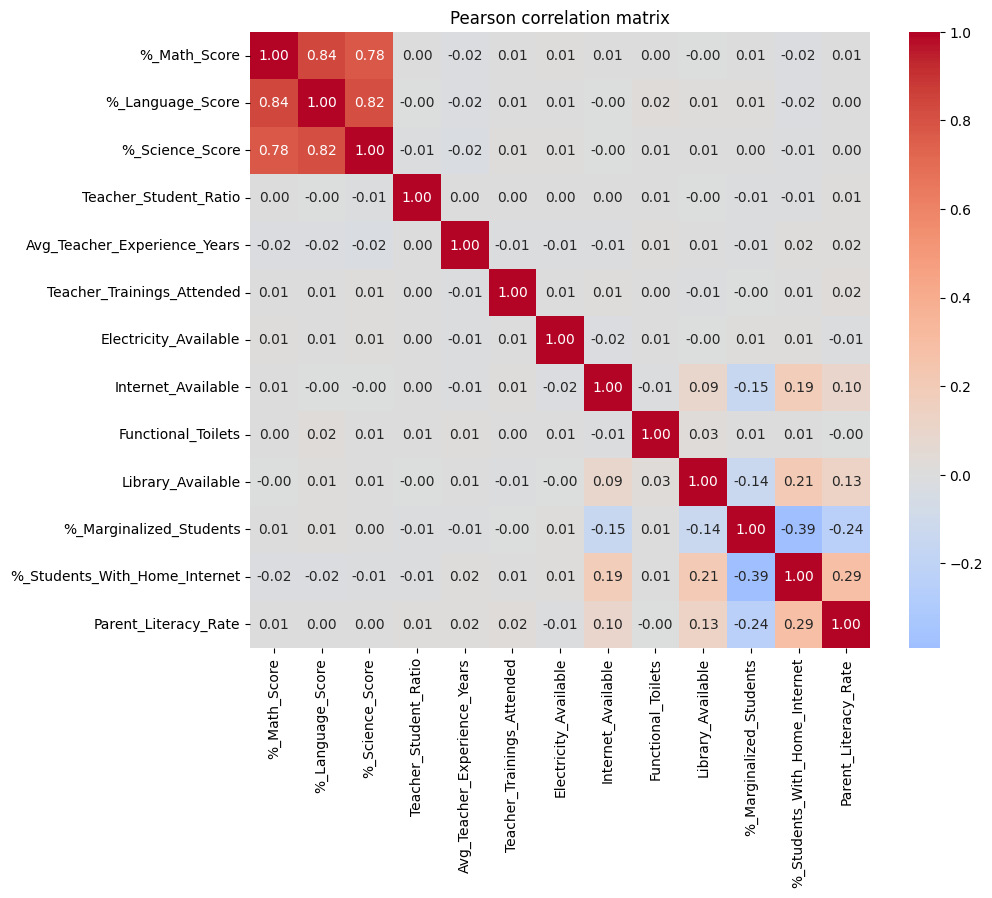

Correlations with %_Math_Score:
 %_Language_Score                 0.840875
%_Science_Score                  0.775072
Electricity_Available            0.011303
Parent_Literacy_Rate             0.010623
Internet_Available               0.009862
%_Marginalized_Students          0.007592
Teacher_Trainings_Attended       0.006932
Functional_Toilets               0.003417
Teacher_Student_Ratio            0.003033
Library_Available               -0.001640
Avg_Teacher_Experience_Years    -0.018319
%_Students_With_Home_Internet   -0.020420
Name: %_Math_Score, dtype: float64


In [92]:
# Numeric columns selection
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
# ensure %_Math_Score is included
if '%_Math_Score' not in numeric:
    numeric.append('%_Math_Score')

corr = df[numeric].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Pearson correlation matrix')
plt.show()

# Print top correlations with %_Math_Score
corr_with_math = corr['%_Math_Score'].drop('%_Math_Score').sort_values(ascending=False)
print('Correlations with %_Math_Score:\n', corr_with_math)


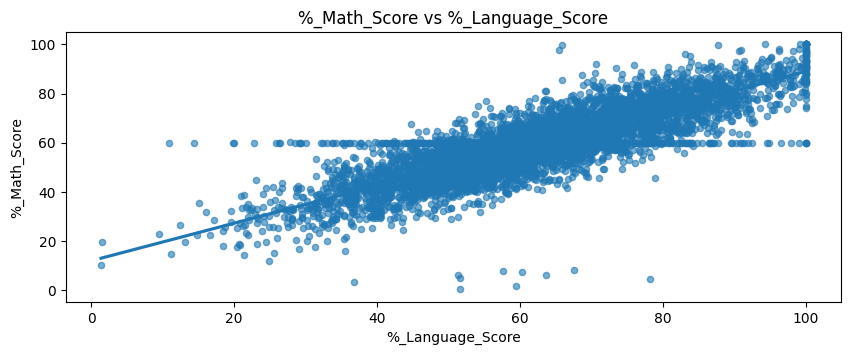

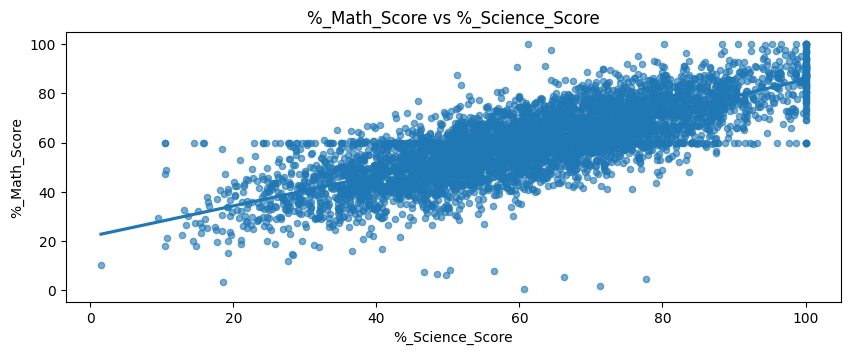

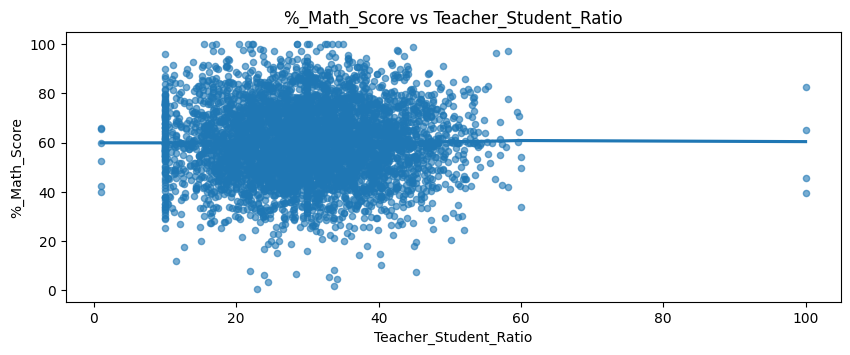

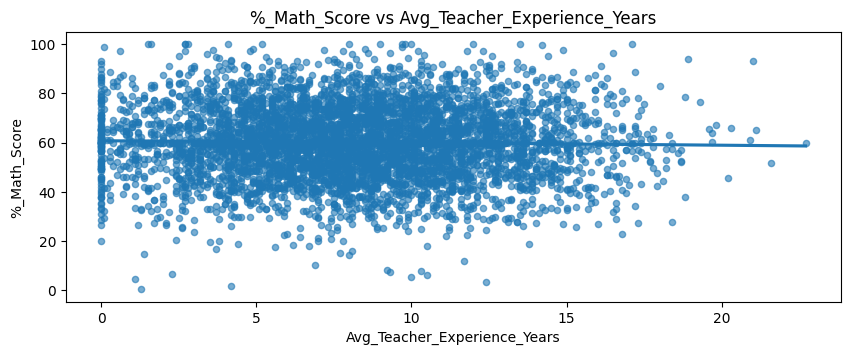

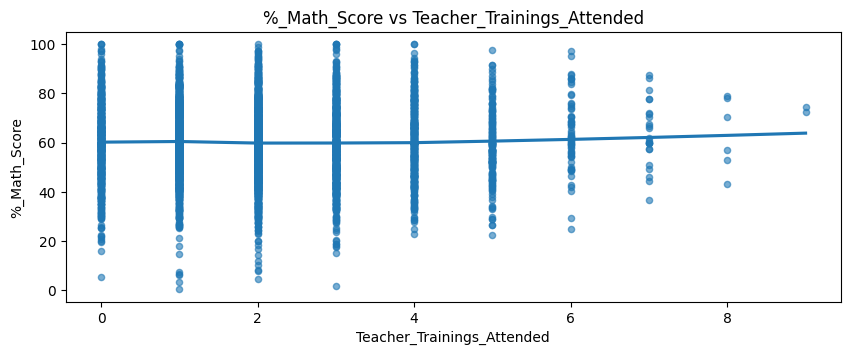

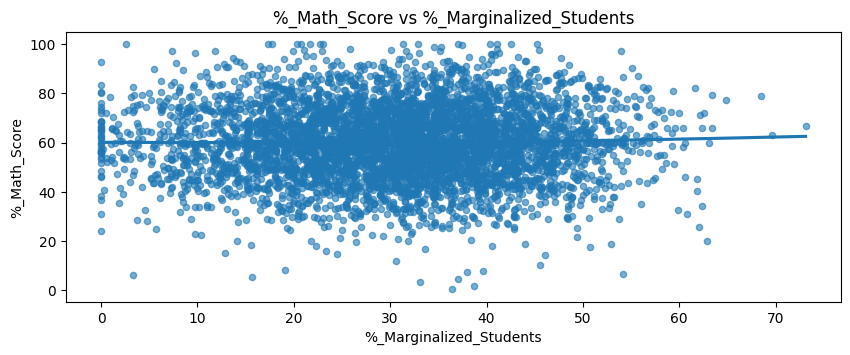

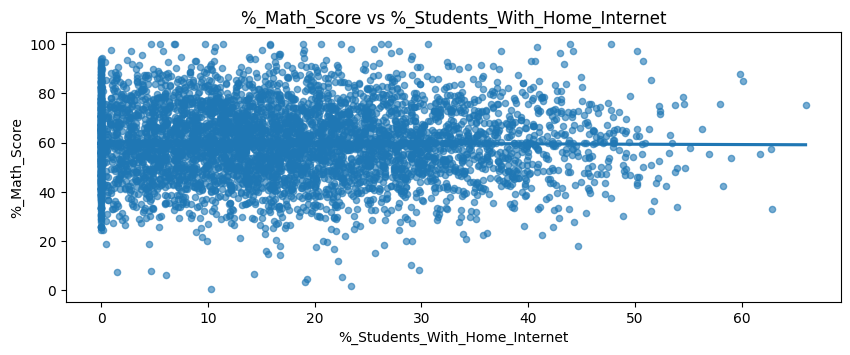

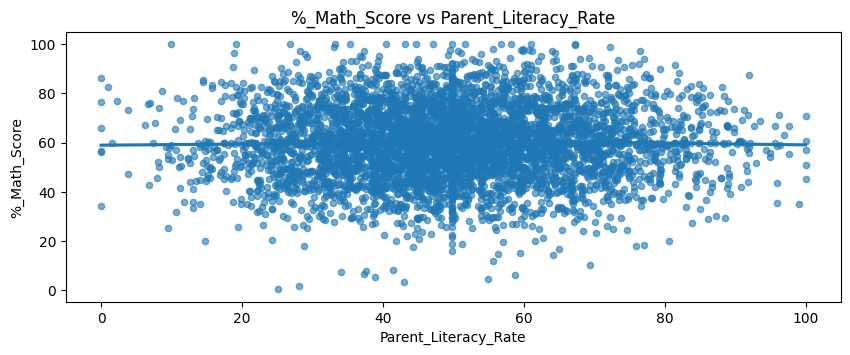

In [93]:
num_cols = ['%_Language_Score','%_Science_Score','Teacher_Student_Ratio',
            'Avg_Teacher_Experience_Years','Teacher_Trainings_Attended',
            '%_Marginalized_Students','%_Students_With_Home_Internet','Parent_Literacy_Rate']

# Keep only those present
num_cols = [c for c in num_cols if c in df.columns]

# Scatter + lowess (or reg) for each numeric predictor
for c in num_cols:
    plt.figure(figsize=(10,3.5))
    sns.regplot(x=c, y='%_Math_Score', data=df, lowess=True, scatter_kws={'s':20, 'alpha':0.6})
    plt.title(f'%_Math_Score vs {c}')
    plt.show()


In [94]:
df.to_csv('cleaned_data_for_analysis.csv', index=False)